## Задание.

Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Mobile Games AB Testing with Cookie Cats

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.stats as sts
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('A_B_cookie_cats2.csv')
data.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [4]:
data.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [5]:
data.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [6]:
data = data[data.sum_gamerounds<3000]
data.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


In [7]:
group_30 = data.version.groupby(data.version == 'gate_30').count()
group_40 = data.version.groupby(data.version == 'gate_40').count()
group_30

version
False    45489
True     44699
Name: version, dtype: int64

In [8]:
group_40

version
False    44699
True     45489
Name: version, dtype: int64

Проверили, что наши данные разделены равномерно. Можем продолжать анализ

Проверяем наши группы на нормальность распределения с помощья теста Колмогорова-Смирнова.

In [9]:
print(stats.kstest(data['sum_gamerounds'][data.version == 'gate_30'], 'norm'))
print(stats.kstest(data['sum_gamerounds'][data.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0)
KstestResult(statistic=0.8707186187388001, pvalue=0.0)


Распределения в обеих группах ненормальное - значит используем тест Манна-Уитни для сравнения.

In [10]:
stats.mannwhitneyu(data[data.version == 'gate_30'].sum_gamerounds, data[data.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

p-value получился 5% - что не может нам достоверно показать имеются статистически значимые различия между группами.

Построим график, чтобы визуально проанализировать сколько раундов играют юзеры.

Text(0.5, 1.0, 'Количество сыгранных раундов игроками за неделю')

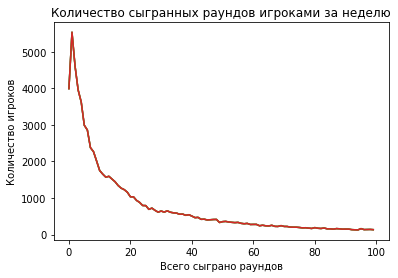

In [11]:
data_plot = data.groupby('sum_gamerounds').count()
plt.plot(data_plot[:100])
plt.xlabel('Всего сыграно раундов')
plt.ylabel('Количество игроков')
plt.title('Количество сыгранных раундов игроками за неделю')

Большая часть игроков играет менее 20 раундов за игру. 

In [12]:
plt.style.use('ggplot')

Group_A = data[data.version == 'gate_30']
print(Group_A)

Group_B = data[data.version == 'gate_40']
print(Group_B)

bins = [0,1,10,20,30,40,50,60,70,80,90,100,200,500]
plot_GA=pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'], bins = bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'], bins= bins)).count())

        userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3            0            0
1          337  gate_30              38            1            0
6         1066  gate_30               0            0            0
11        2101  gate_30               0            0            0
13        2179  gate_30              39            1            0
...        ...      ...             ...          ...          ...
90179  9998576  gate_30              14            1            0
90180  9998623  gate_30               7            0            0
90182  9999178  gate_30              21            1            0
90183  9999349  gate_30              10            0            0
90186  9999710  gate_30              28            1            0

[44699 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
2          377  gate_40             165            1            0
3          483  gate_40               1           

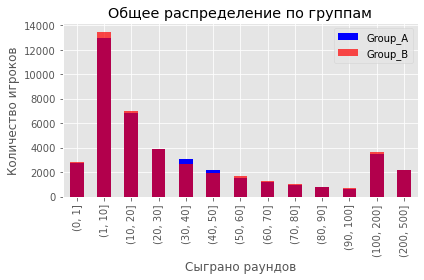

In [13]:
ax = plot_GA.plot(kind= 'bar', y= 'userid', color= 'blue', alpha= 1,
                 title= 'Общее распределение по группам')
plot_GB.plot(kind= 'bar', y= 'userid', ax= ax, color= 'red', alpha= 0.7)
ax.set_xlabel('Сыграно раундов')
ax.set_ylabel('Количество игроков')
plt.legend(['Group_A', 'Group_B'])
plt.tight_layout()
plt.grid(True)

In [14]:
oneday = data.retention_1.sum()/data.retention_1.count()
oneday

0.4452144409455803

In [15]:
oneday = data.retention_1.groupby(data.version).sum()/data.retention_1.groupby(data.version).count()
oneday

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

In [16]:
boot_1d = []
for i in range(500):
    boot_mean = data.retention_1.sample(frac= 1, replace= True).groupby(data.version).mean()
    boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)
boot_1d

version,gate_30,gate_40
retention_1,0.447226,0.444611
retention_1,0.451923,0.440720
retention_1,0.449722,0.441786
retention_1,0.449794,0.440777
retention_1,0.445808,0.445973
...,...,...
retention_1,0.446892,0.439965
retention_1,0.444447,0.443051
retention_1,0.447736,0.438970
retention_1,0.449077,0.440068


Text(0.5, 0, 'Среднее RETENTION')

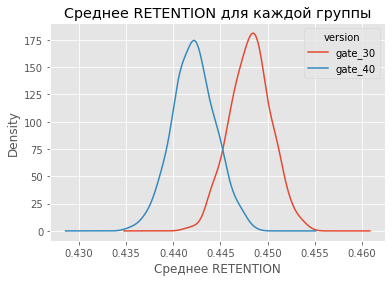

In [17]:
ax = boot_1d.plot.kde()
ax.set_title('Среднее RETENTION для каждой группы')
ax.set_xlabel('Среднее RETENTION')

Text(0.5, 1.0, 'разница')

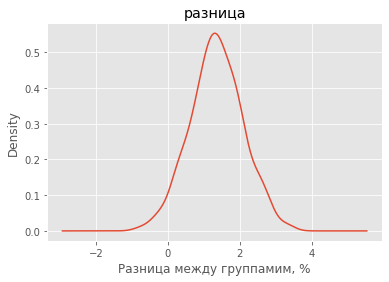

In [18]:
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40'])/boot_1d['gate_40'] * 100
ax = boot_1d['difference'].plot.kde()
ax.set_xlabel('Разница между группамим, %')
ax.set_title('разница')

In [19]:
prob = (boot_1d['difference']>0).sum()/len(boot_1d['difference'])
prob

0.966

Теперь подобным же образом исследуем Retention 7-day 

In [20]:
day_7 = data.retention_7.groupby(data.version).sum()/data.retention_7.groupby(data.version).count()
day_7

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

In [21]:
boot_7d = []
for i in range(500):
    boot_mean = data.retention_7.sample(frac= 1, replace= True).groupby(data.version).mean()
    boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)
boot_7d

version,gate_30,gate_40
retention_7,0.189933,0.185363
retention_7,0.191288,0.182761
retention_7,0.186649,0.180686
retention_7,0.185676,0.182369
retention_7,0.188350,0.182535
...,...,...
retention_7,0.189711,0.179666
retention_7,0.194153,0.181804
retention_7,0.186825,0.181706
retention_7,0.191377,0.179441


Text(0.5, 0, 'Среднее RETENTION')

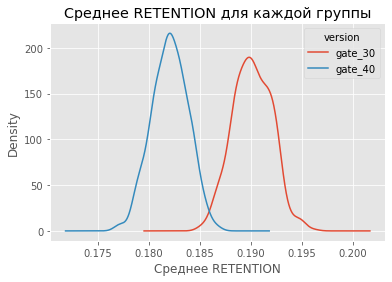

In [22]:
ax = boot_7d.plot.kde()
ax.set_title('Среднее RETENTION для каждой группы')
ax.set_xlabel('Среднее RETENTION')

Text(0.5, 1.0, 'разница')

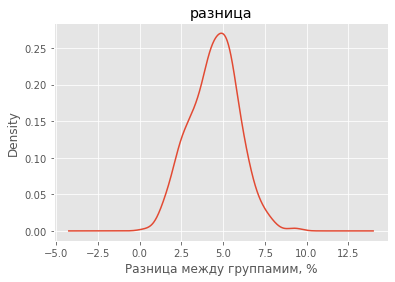

In [23]:
boot_7d['difference'] = (boot_7d['gate_30'] - boot_7d['gate_40'])/boot_7d['gate_40'] * 100
ax = boot_7d['difference'].plot.kde()
ax.set_xlabel('Разница между группамим, %')
ax.set_title('разница')

In [24]:
prob7 = (boot_7d['difference']>0).sum()/len(boot_7d['difference'])
prob7

1.0

### Вывод.

Мы видим статистическую значимость и более ярко она выражается на 7 дневном сроке. 

Чтобы удержание пользователей было высоким, нам не нужно перемещать ворота на 40 уровень. 